In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import string
import re
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import os

In [2]:
# Config
sns.set(style='whitegrid')
plt.rcParams["figure.figsize"] = (10,6)

# Chargement des données
df = pd.read_csv("../data/cv_dataset.csv")

In [3]:
# Aperçu
df.head()

category                                             resume
0  MICROSOFT AZURE  Tresor LUKAKU Démarrage ASAP FREE-LANCE Tel :+...
1  MICROSOFT AZURE  / Langues Français lu écrit parlé. Anglais lu ...
2  MICROSOFT AZURE  1/5 AKRAM BCHIRI Consultant DEVOPS/Cloud Tél :...
3  MICROSOFT AZURE  Modif Mohamed Ali Znaidi MSBI (SSIS SSAS SSRS)...
4  MICROSOFT AZURE  Zakaria Z. DATA ENGINEER & BI ENGINEER +7 ANNÉ...

In [4]:
# Nombre de CVs
print("Nombre total de CVs :", len(df))

# Nombre de catégories uniques
print("Catégories uniques :", df['category'].nunique())
print("Liste des catégories :", df['category'].unique())

Nombre total de CVs : 536
Catégories uniques : 15
Liste des catégories : ['MICROSOFT AZURE' 'AWS' 'CONTROLEUR DE GESTION' 'POWER BI' 'Data Analyst'
 'Data Engineer' 'DEVOPS' 'TALEND' 'JAVA' 'Power Platform' 'PHP' 'GCP'
 'ANAPLAN' 'SALESFORCE' 'SAP']


Nombre de CVs  Pourcentage
category                                         
JAVA                             144        26.87
POWER BI                         120        22.39
ANAPLAN                           99        18.47
SALESFORCE                        67        12.50
TALEND                            28         5.22
AWS                               24         4.48
SAP                               20         3.73
Data Analyst                      11         2.05
GCP                                8         1.49
MICROSOFT AZURE                    6         1.12
CONTROLEUR DE GESTION              3         0.56
Data Engineer                      2         0.37
Power Platform                     2         0.37
DEVOPS                             1         0.19
PHP                                1         0.19

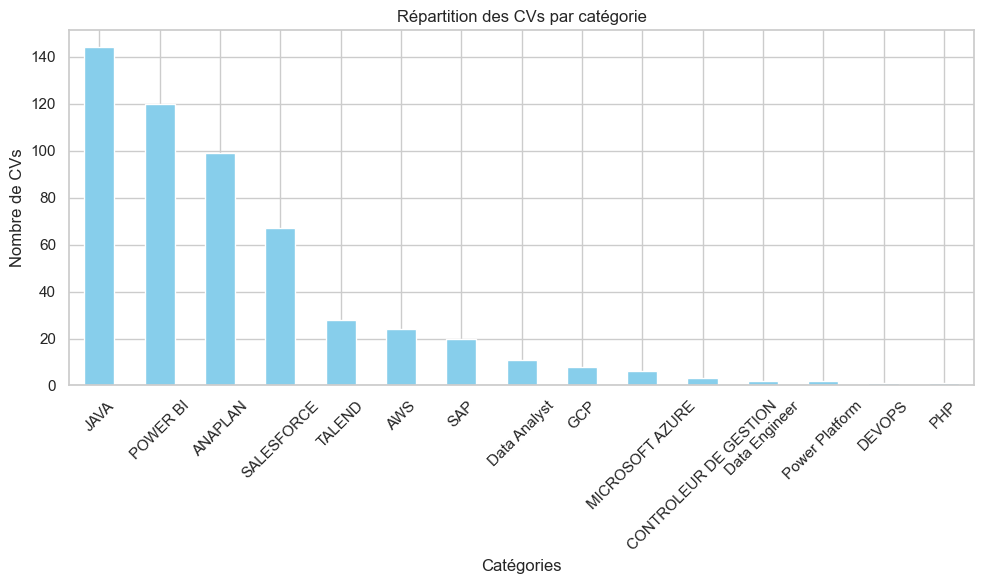

In [5]:
category_counts = df['category'].value_counts()
category_ratio = category_counts / len(df) * 100

# Affichage en % par catégorie
df_cat_stat = pd.DataFrame({
    "Nombre de CVs": category_counts,
    "Pourcentage": category_ratio.round(2)
})
display(df_cat_stat)

# Visualisation
category_counts.plot(kind='bar', color='skyblue')
plt.title("Répartition des CVs par catégorie")
plt.ylabel("Nombre de CVs")
plt.xlabel("Catégories")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

count      536.000000
mean       801.440299
std       1428.001655
min          3.000000
25%        406.750000
50%        555.500000
75%        878.250000
max      30931.000000
Name: resume_length_words, dtype: float64
count       536.000000
mean       5407.645522
std        8519.345679
min          24.000000
25%        2822.750000
50%        3891.500000
75%        6108.250000
max      181055.000000
Name: resume_length_chars, dtype: float64


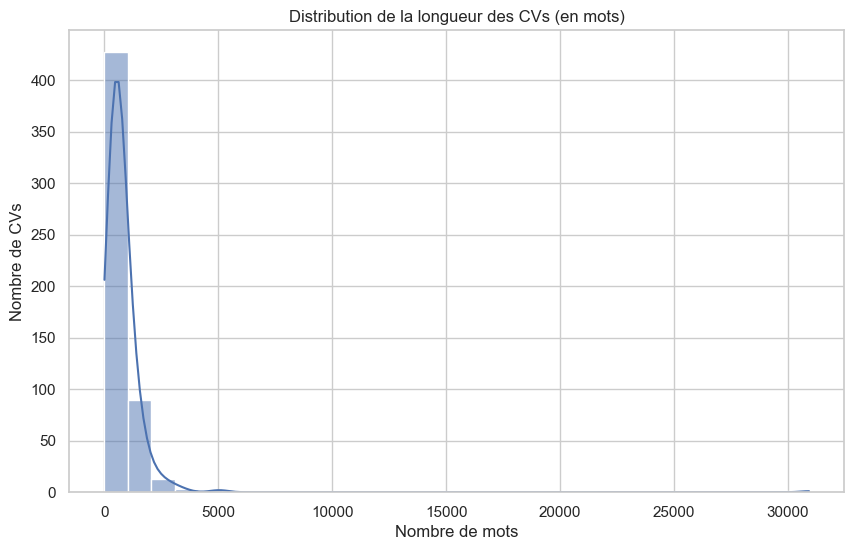

In [6]:
# Longueur des résumés
df["resume_length_words"] = df["resume"].apply(lambda x: len(x.split()))
df["resume_length_chars"] = df["resume"].apply(len)

# Statistiques
print(df["resume_length_words"].describe())
print(df["resume_length_chars"].describe())

# Histogramme
sns.histplot(df["resume_length_words"], bins=30, kde=True)
plt.title("Distribution de la longueur des CVs (en mots)")
plt.xlabel("Nombre de mots")
plt.ylabel("Nombre de CVs")
plt.show()


In [7]:
# Vérification des valeurs manquantes
df.isnull().sum()


category               0
resume                 0
resume_length_words    0
resume_length_chars    0
dtype: int64

In [10]:
french_stopwords = {
    "et", "le", "la", "les", "un", "une", "de", "des", "du", "en", "au", "aux",
    "ce", "ces", "cette", "dans", "pour", "par", "sur", "avec", "sans", "se",
    "son", "sa", "ses", "leurs", "est", "sont", "été", "être", "à", "il", "elle",
    "ils", "elles", "qui", "que", "quoi", "dont", "où", "mais", "ou", "donc", "or", "ni", "car"
}
stop_words = ENGLISH_STOP_WORDS.union(french_stopwords)

In [11]:
def clean_text(text):
    text = text.lower()
    text = re.sub(r'\d+', '', text)  # enlever les chiffres
    text = text.translate(str.maketrans('', '', string.punctuation))  # enlever ponctuation
    tokens = text.split()
    tokens = [word for word in tokens if word not in stop_words]
    return ' '.join(tokens)

In [12]:
df["cleaned_resume"] = df["resume"].astype(str).apply(clean_text)

In [13]:
# === 4. Vectorisation TF-IDF ===
vectorizer = TfidfVectorizer(max_features=300)
X = vectorizer.fit_transform(df["cleaned_resume"]).toarray()
df["vectorized"] = X.tolist()

In [14]:
# === 5. Générer les nuages de mots ===
output_dir = "wordclouds"
os.makedirs(output_dir, exist_ok=True)

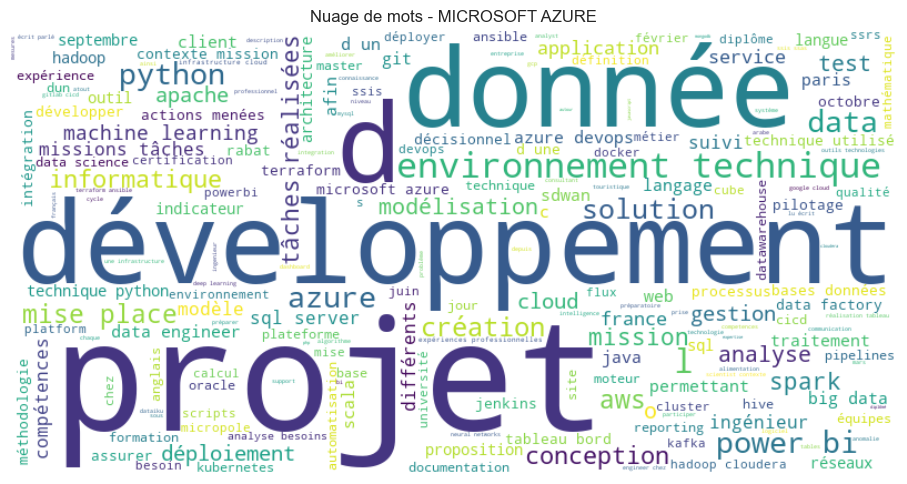

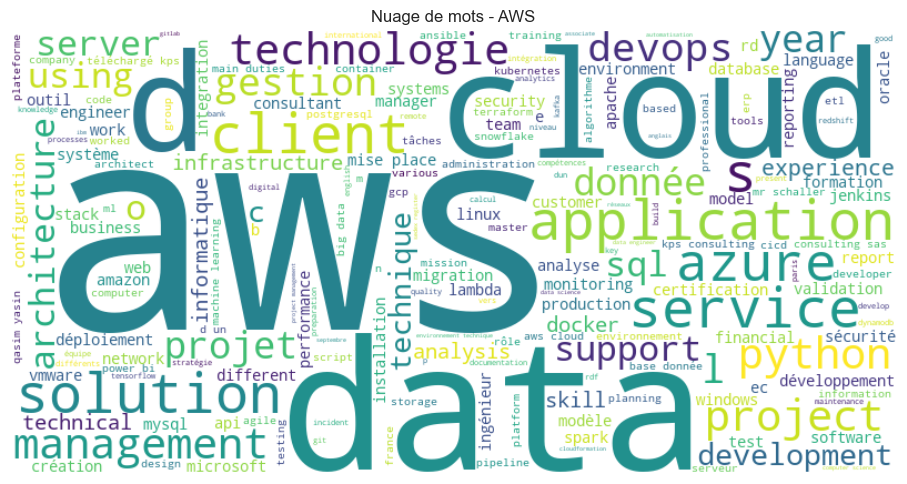

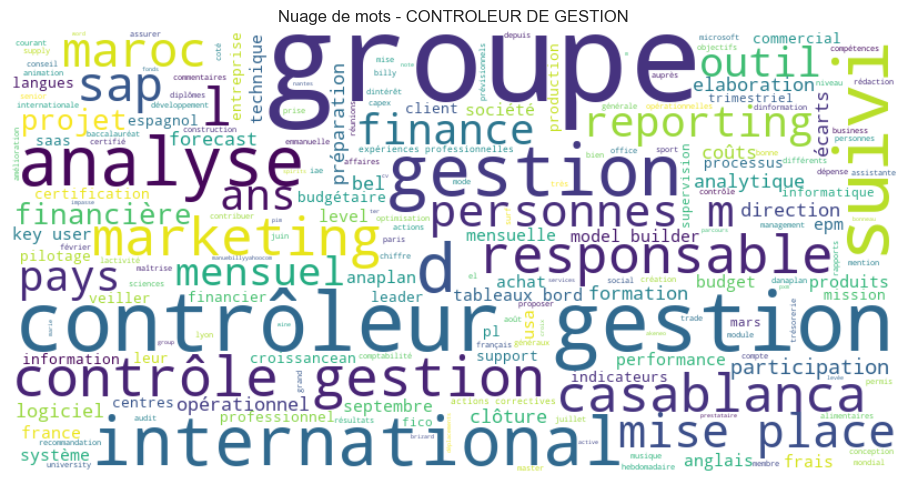

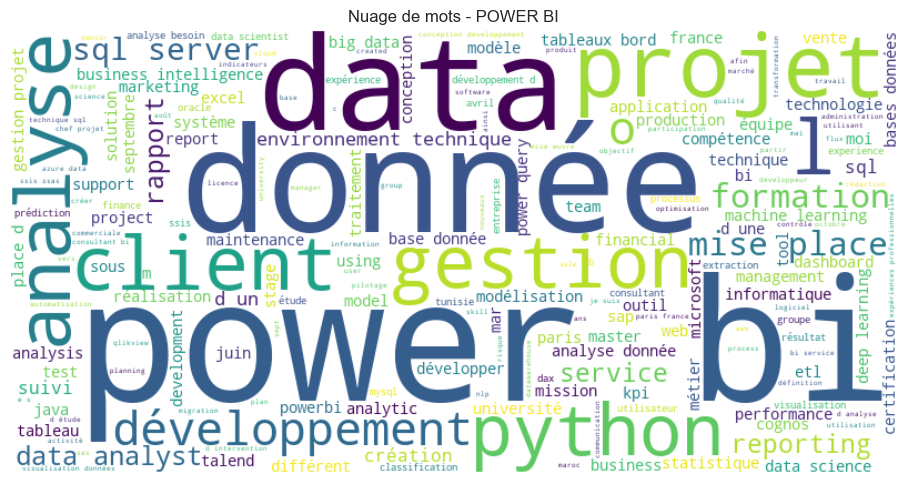

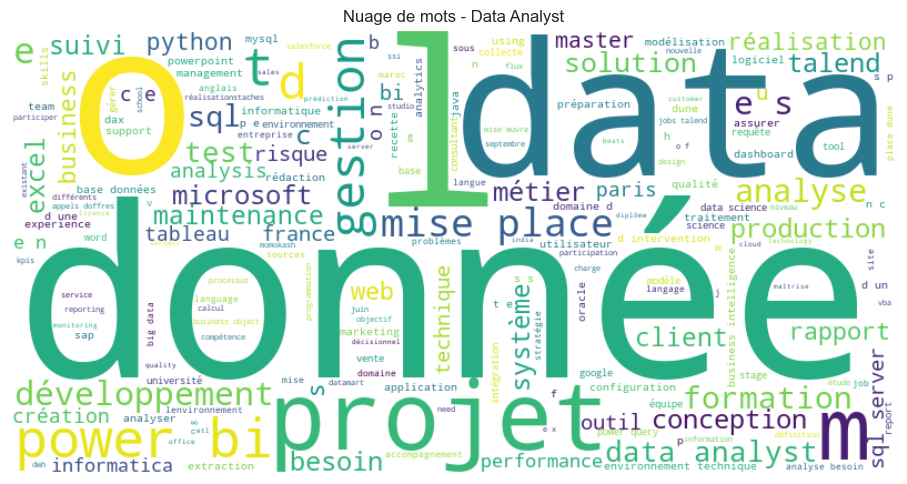

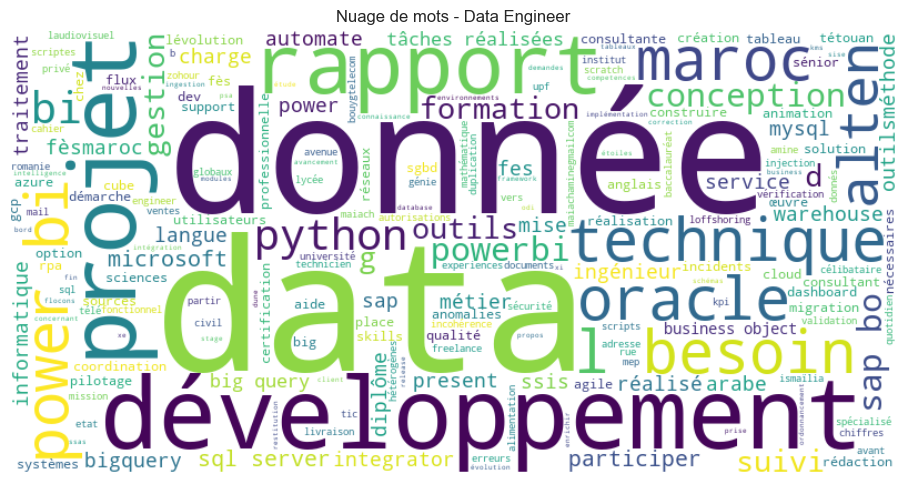

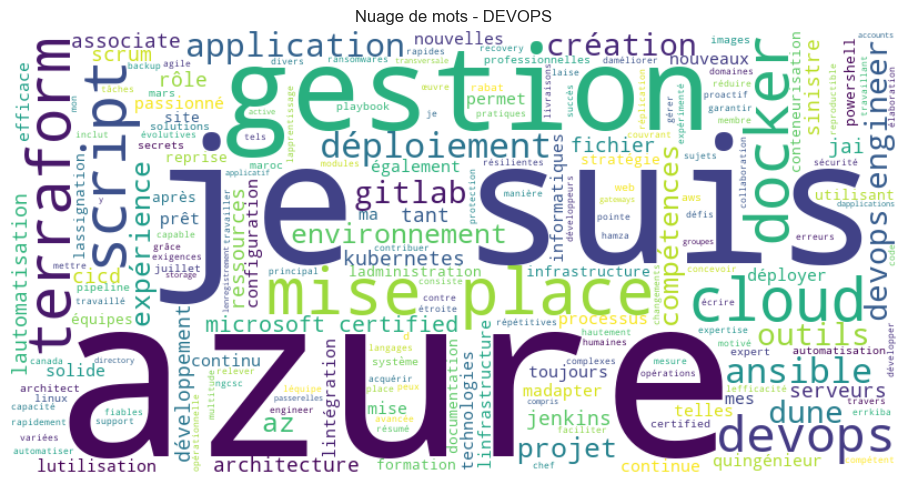

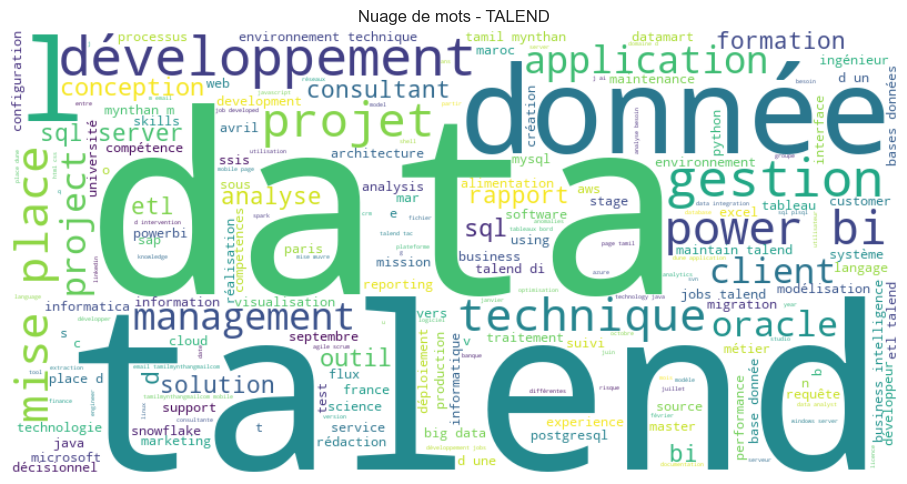

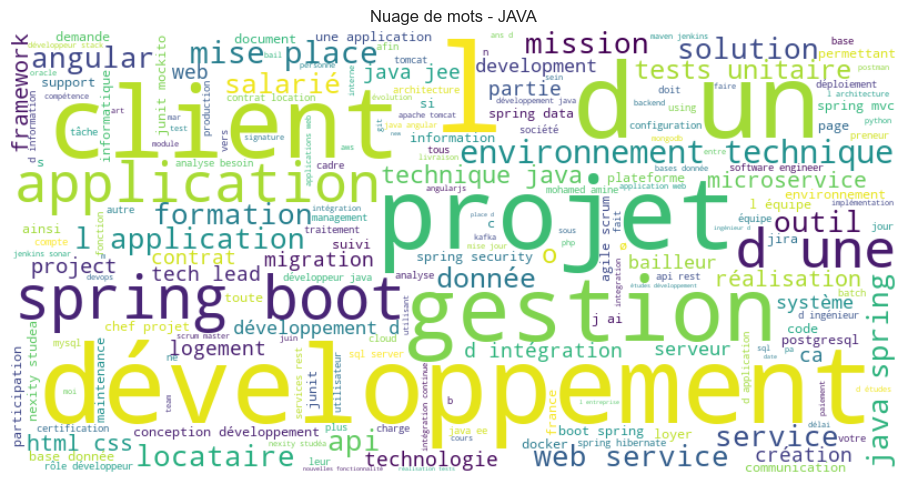

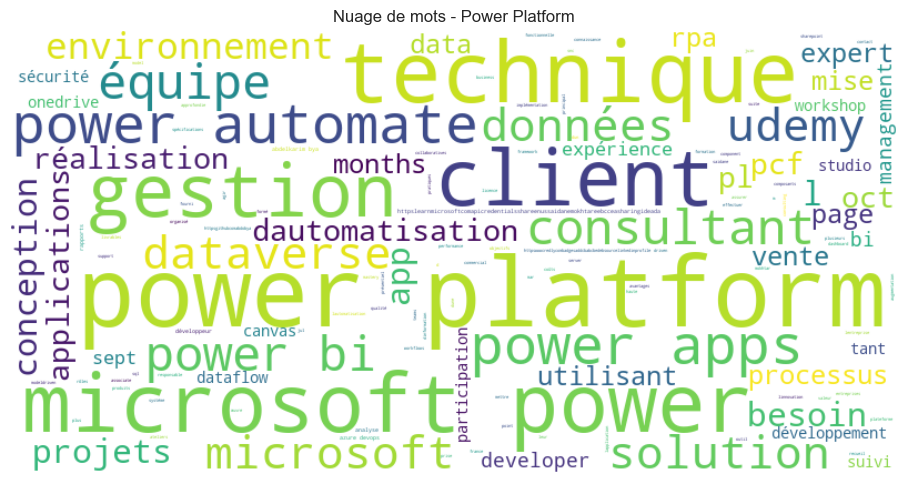

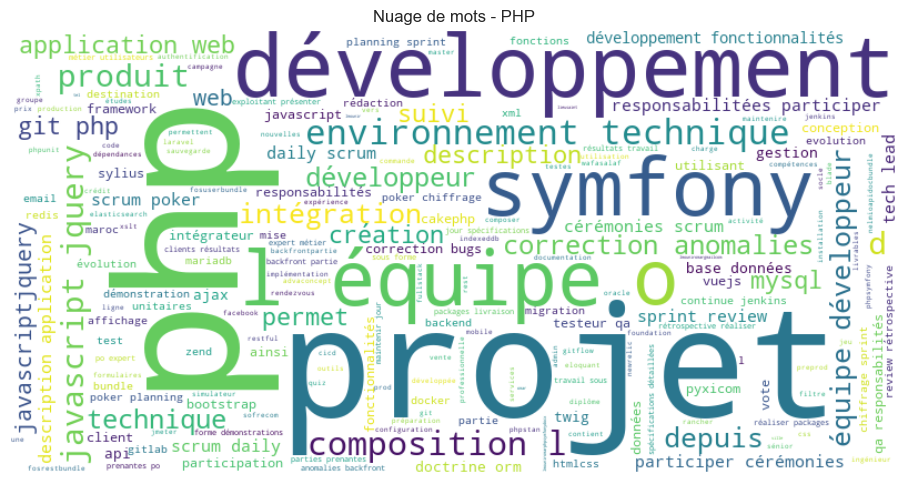

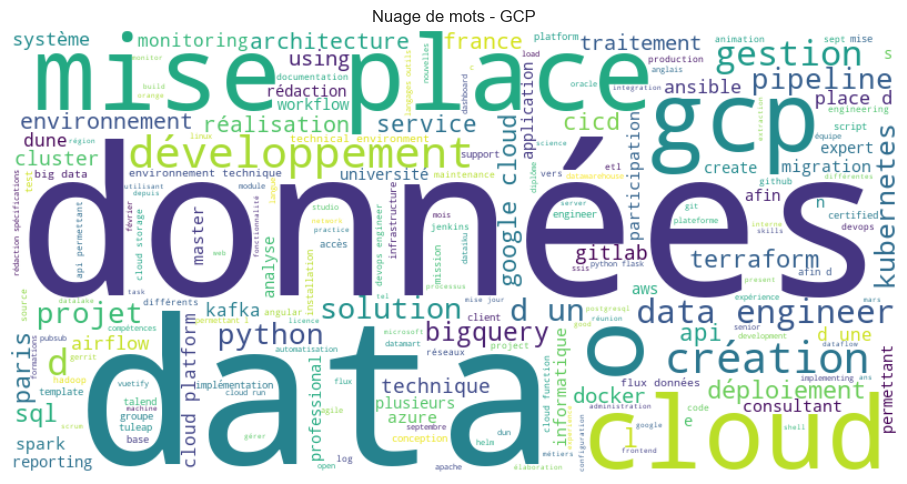

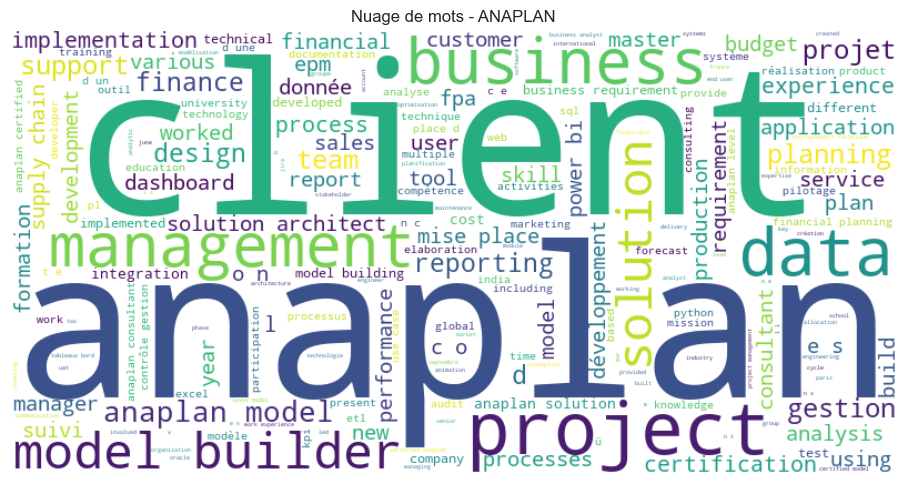

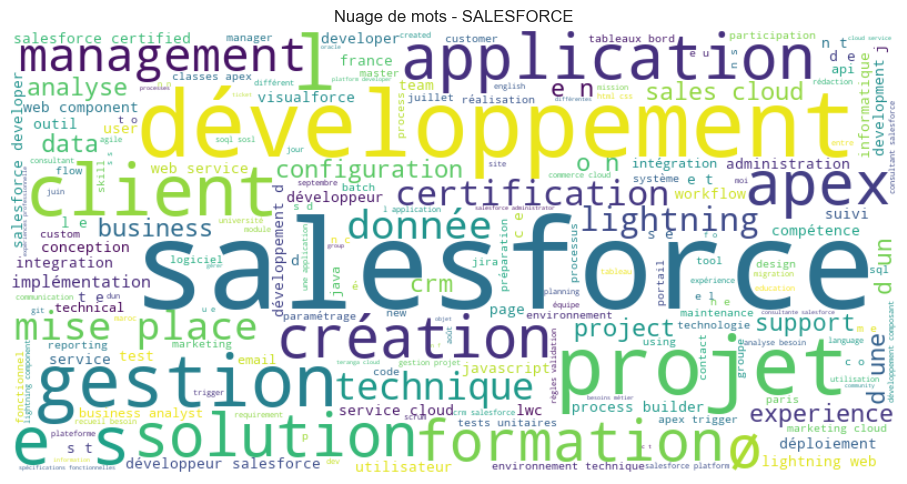

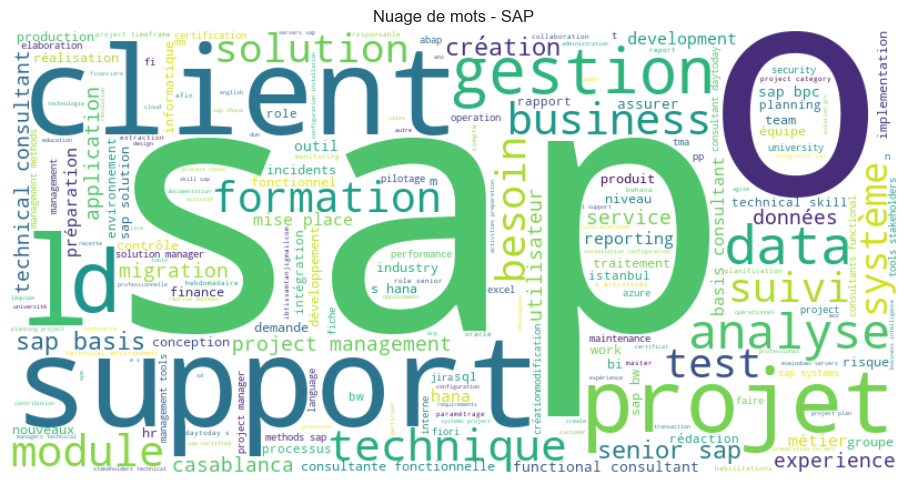

In [15]:
for cat in df["category"].unique():
    text_cat = ' '.join(df[df["category"] == cat]["cleaned_resume"])
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text_cat)

    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.title(f"Nuage de mots - {cat}")
    plt.tight_layout()
    plt.show()
    plt.close()

In [17]:
df.to_csv("../data/cv_dataset_cleaned.csv", index=False)